In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('C:/Users/saide/Desktop/study/python_upskill/ml_algorithms/house_price.csv')

In [3]:
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [4]:
df = df.drop_duplicates()
df = df.fillna(df.median(numeric_only=True))
df = df.select_dtypes(include=[np.number])

In [5]:
target_col = "House_Price"  
X = df.drop(columns=[target_col])
y = df[target_col]

In [6]:
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [8]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

In [9]:
class SVRScratch:
    def __init__(self, lr=0.001, n_iters=5000, C=1.0, epsilon=0.1):
        self.lr = lr
        self.n_iters = n_iters
        self.C = C
        self.epsilon = epsilon
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float).reshape(-1)
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features, dtype=float)
        self.bias = 0.0
        self.loss_history = []
        for _ in range(self.n_iters):
            y_pred = X @ self.weights + self.bias
            residuals = y - y_pred  # r_i
            dw = self.weights.copy()  # d/dw (0.5||w||^2) = w
            db = 0.0
            mask_pos = residuals > self.epsilon
            mask_neg = residuals < -self.epsilon
            if np.any(mask_pos):
                dw -= self.C * np.sum(X[mask_pos], axis=0)
                db -= self.C * np.sum(np.ones(np.sum(mask_pos)))
            if np.any(mask_neg):
                dw += self.C * np.sum(X[mask_neg], axis=0)
                db += self.C * np.sum(np.ones(np.sum(mask_neg)))
            dw /= n_samples
            db /= n_samples
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            eps_loss = np.maximum(0, np.abs(residuals) - self.epsilon)
            loss = 0.5 * np.dot(self.weights, self.weights) + self.C * np.mean(eps_loss)
            self.loss_history.append(loss)
        return self
    def predict(self, X):
        X = np.array(X, dtype=float)
        return X @ self.weights + self.bias

In [10]:
svr = SVRScratch(lr=0.01, n_iters=8000, C=10.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = svr.predict(X_test_scaled)
y_pred_svr = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

In [11]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("SVR (Scratch) Metrics")
print("MSE :", mse_svr)
print("RMSE:", rmse_svr)
print("MAE :", mae_svr)
print("R2  :", r2_svr)

SVR (Scratch) Metrics
MSE : 109367652.07405709
RMSE: 10457.899027723355
MAE : 8243.552397098303
R2  : 0.9983032952022749


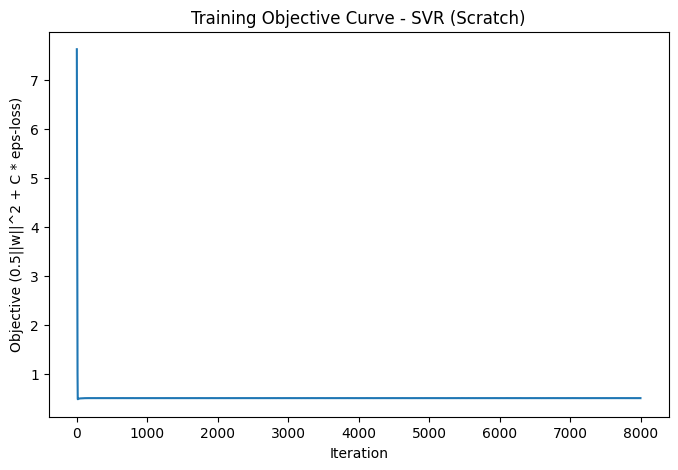

In [12]:
# Training loss curve (this IS applicable here because we optimize an objective iteratively)
plt.figure(figsize=(8, 5))
plt.plot(svr.loss_history)
plt.title("Training Objective Curve - SVR (Scratch)")
plt.xlabel("Iteration")
plt.ylabel("Objective (0.5||w||^2 + C * eps-loss)")
plt.show()

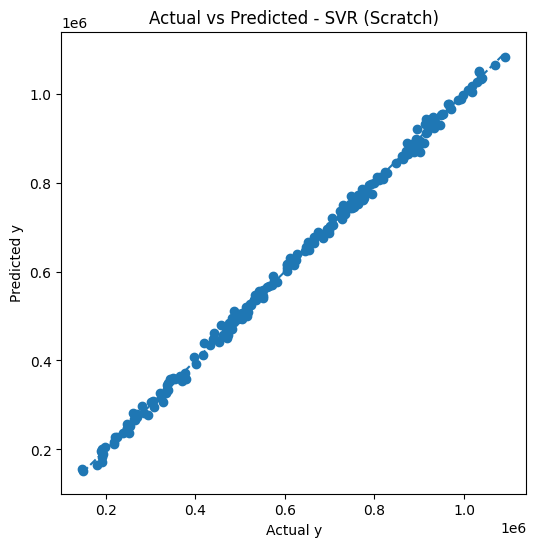

In [13]:
# Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_svr)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.title("Actual vs Predicted - SVR (Scratch)")
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.show()

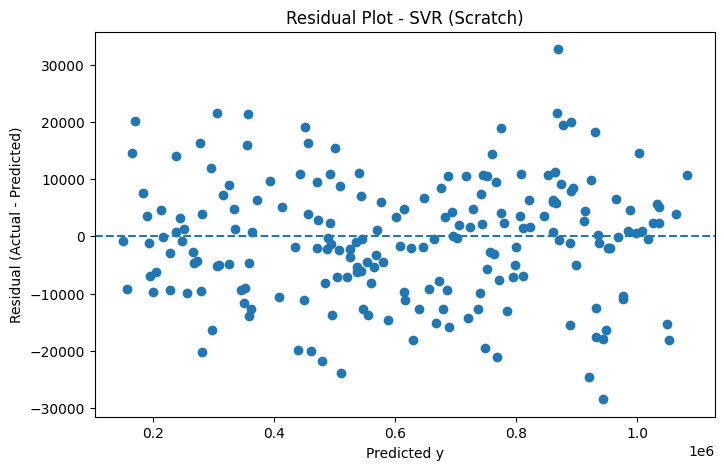

In [14]:
# Residual plot
residuals_svr = y_test.values - y_pred_svr
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_svr, residuals_svr)
plt.axhline(0, linestyle='--')
plt.title("Residual Plot - SVR (Scratch)")
plt.xlabel("Predicted y")
plt.ylabel("Residual (Actual - Predicted)")
plt.show()

In [15]:
svr_results = pd.DataFrame([{
    "Model": "SVR (Scratch, Linear)",
    "MSE": mse_svr,
    "RMSE": rmse_svr,
    "MAE": mae_svr,
    "R2": r2_svr,
    "C": 10.0,
    "epsilon": 0.1,
    "lr": 0.01,
    "iters": 8000
}])
svr_results

,Model,MSE,RMSE,MAE,R2,C,epsilon,lr,iters
0,"SVR (Scratch, Linear)",1.093677e+08,10457.899028,8243.552397,0.998303,10.0,0.1,0.01,8000
